### 3.6 Training : continued


### Imports :

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import category_encoders as ce

#### Making a copy of the dataset

In [2]:
vfl=pd.read_csv('vflabel.csv',index_col=0)

In [3]:
vfl.head(5).T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


#### Making a list of columns

In [4]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

#### Using Weight of Evidence encoder

In [5]:

woe = ce.WOEEncoder(cols=cols)

***Splitting the data into train and test by stratifying target column***

In [6]:
#Peform the train test split 
X_trw, X_tew, y_trw, y_tew = train_test_split(vfl.drop(columns='FraudFound_P'), 
                                                    vfl.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vfl.FraudFound_P)

***Transforming train and test data with weight of evidence encoder***

In [7]:
lab_train = woe.fit_transform(X_trw, y_trw)
lab_test=woe.transform(X_tew)

***Preparing data for use with pycaret by merging the independent and target variable***

In [8]:
lab_traindf=pd.concat([lab_train,y_trw],axis='columns')
lab_testdf=pd.concat([lab_test,y_tew],axis='columns')
lab_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


***Using pycaret to get the best model with weight of evidence encoder and using SMOTE***

In [9]:
from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


***Importing average precision score to evaluate the model based on area under precison recall curve***

In [10]:
from sklearn.metrics import average_precision_score

add_metric('AUPRC','Average',average_precision_score,greater_is_better = True)  
setup_label = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0598,0.0120
gbc,Gradient Boosting Classifier,0.9401,0.7926,0.0153,0.4250,0.0293,0.0257,0.0706,0.0671,0.7300
lightgbm,Light Gradient Boosting Machine,0.9387,0.8152,0.0339,0.3407,0.0614,0.0519,0.0916,0.0717,0.1140
rf,Random Forest Classifier,0.9379,0.7865,0.0254,0.2895,0.0464,0.0370,0.0692,0.0680,0.6300
et,Extra Trees Classifier,0.9371,0.7913,0.0390,0.3161,0.0690,0.0561,0.0919,0.0701,0.4900
ada,Ada Boost Classifier,0.9145,0.7811,0.1458,0.2058,0.1685,0.1252,0.1282,0.0809,0.1960
dt,Decision Tree Classifier,0.8728,0.5554,0.1949,0.1281,0.1545,0.0889,0.0913,0.0737,0.0460
knn,K Neighbors Classifier,0.7737,0.7012,0.4932,0.1308,0.2067,0.1239,0.1615,0.0951,0.6820
qda,Quadratic Discriminant Analysis,0.6778,0.7770,0.7831,0.1319,0.2257,0.1374,0.2252,0.1166,0.0200
nb,Naive Bayes,0.6675,0.7845,0.8220,0.1330,0.2288,0.1403,0.2359,0.1201,0.0160


### logistic Regression model performed the best on average precison score and it will be used for finetuning the model

In [11]:
label_lr = create_model('lr',fold=5)
tuned_label_lr=tune_model(label_lr,optimize='F1',fold=5)
print(tuned_label_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average
Fold,,,,,,,,
0,0.6651,0.8142,0.9068,0.1413,0.2446,0.1574,0.2714,0.1337
1,0.6363,0.8099,0.8475,0.1250,0.2179,0.1269,0.2271,0.1151
2,0.6570,0.7968,0.8729,0.1346,0.2333,0.1447,0.2512,0.1251
3,0.6351,0.8121,0.8814,0.1284,0.2241,0.1337,0.2414,0.1203
4,0.6113,0.7723,0.8305,0.1160,0.2035,0.1101,0.2050,0.1065
Mean,0.6410,0.8011,0.8678,0.1291,0.2247,0.1346,0.2392,0.1201
Std,0.0189,0.0156,0.0266,0.0086,0.0139,0.0160,0.0224,0.0092


LogisticRegression(C=9.921, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### We will use the tuned Logistic Regression model for further training and modeling as it gave better F1, recall and precison score compared to previous models
LogisticRegression(C=9.921, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### To be consistent from now onwards F1 score will be used for model selection

### Optimizing class weights in logistic regressiom model using grid search with F1 as criteria  without balancing the dataset for class imbalance

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 985 out of 1000 | elapsed:   31.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.0s finished


{'class_weight': {0: 0.1293467336683417, 1: 0.8706532663316583}}


Text(0.5, 1.0, 'Scoring for different class weights')

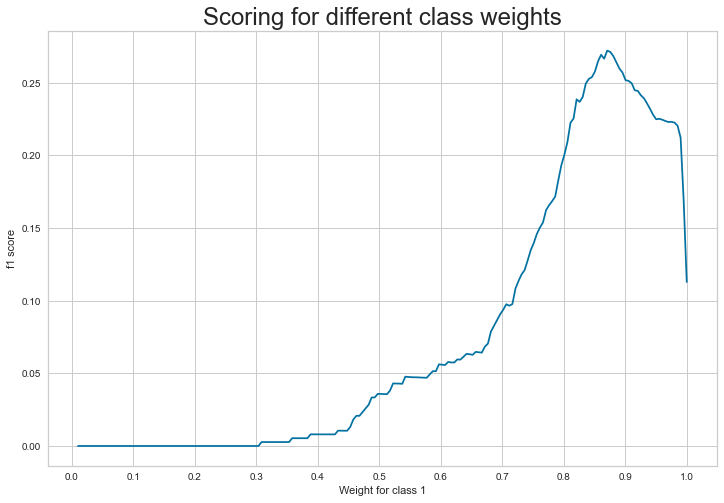

In [12]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(lab_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('f1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

***Best class weight for f1 score are {'class_weight': {0: 0.1293467336683417, 1: 0.8706532663316583}}***

### Using new class weights to check the model on train and test data 

The f1 score for the training data: 0.28461833525124663
The f1 score for the testing data: 0.21162444113263784
Train 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92     11598
           1       0.20      0.50      0.28       738

    accuracy                           0.85     12336
   macro avg       0.58      0.69      0.60     12336
weighted avg       0.92      0.85      0.88     12336

Test 
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      2899
           1       0.15      0.38      0.21       185

    accuracy                           0.83      3084
   macro avg       0.55      0.62      0.56      3084
weighted avg       0.91      0.83      0.86      3084



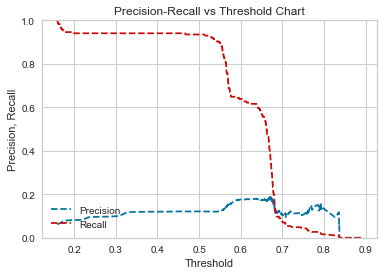

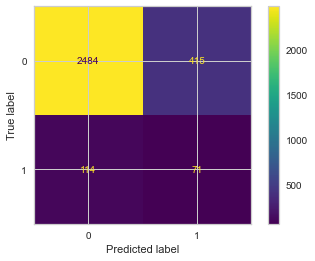

In [25]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
lr.fit(lab_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(lab_train)
pred_test = lr.predict(lab_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_tew, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()

Logistic Regression model with weight of evidence encoder and class weight optimization

The f1 score for the training data: 0.28461833525124663

The f1 score for the testing data: 0.21162444113263784

### Plotting Precsion Recall Curve with best threshold based on F1 score

Threshold=0.449, F-Score=0.24417


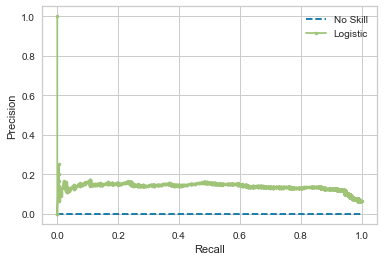

In [31]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
model.fit(lab_train,y_trw)
# predict probabilities
yhat = model.predict_proba(lab_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_tew, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
#ix = argmax(fscore)
#print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
#pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

***At threshold of 0.449 the f1-Score is highest at 0.24417***

###  In this step we will use CatBoost Encoder to see if it improves the f1 score

In [15]:
import category_encoders as ce
CBE= ce.CatBoostEncoder(cols=cols)

In [16]:
CBE_train = CBE.fit_transform(X_trw, y_trw)
CBE_test=CBE.transform(X_tew)

In [17]:
CBE_traindf=pd.concat([lab_train,y_trw],axis='columns')
CBE_testdf=pd.concat([lab_test,y_tew],axis='columns')
CBE_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


### Training the model with Catboost encoded variables and optimizing it for class weights using logistic regression 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.5s finished


{'class_weight': {0: 0.06964824120603015, 1: 0.9303517587939698}}


Text(0.5, 1.0, 'Scoring for different class weights')

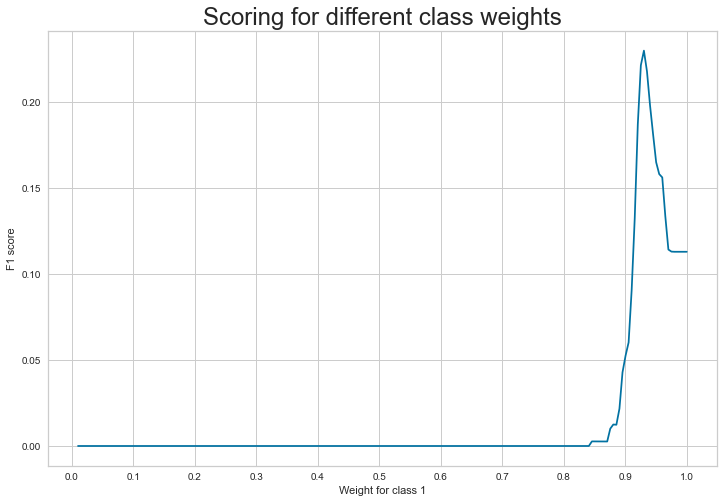

In [19]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(CBE_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

***Best f1 score is acheived by {'class_weight': {0: 0.06964824120603015, 1: 0.9303517587939698}}***

### Checking performance of model with CatBoost Encoded variables, and new  class weights with  logisitic regression classifier optimized earlier

The f1 score for the training data: 0.22631390775831248
The f1 score for the testing data: 0.21450712957222567
Train
               precision    recall  f1-score   support

           0       0.99      0.64      0.77     11598
           1       0.13      0.86      0.23       738

    accuracy                           0.65     12336
   macro avg       0.56      0.75      0.50     12336
weighted avg       0.93      0.65      0.74     12336

Test
               precision    recall  f1-score   support

           0       0.99      0.57      0.72      2899
           1       0.12      0.94      0.21       185

    accuracy                           0.59      3084
   macro avg       0.56      0.75      0.47      3084
weighted avg       0.94      0.59      0.69      3084



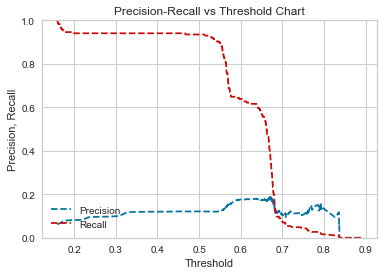

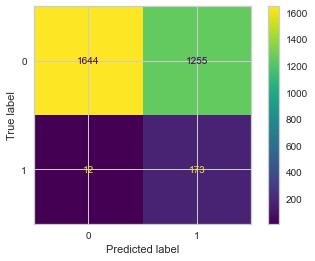

In [24]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.07, 1: 0.93})

lr.fit(CBE_train,y_trw)

# Predicting on the test data
pred_train =lr.predict(CBE_train)
pred_test = lr.predict(CBE_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_tew, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train\n",classification_report(y_trw,pred_train))
print("Test\n",classification_report(y_tew,pred_test))
plt.show()

Logistic Regression model with CatBoost encoder and class weight optimization

The f1 score for the training data: 0.22631390775831248

The f1 score for the testing data: 0.21450712957222567

###  Checking for best threshold that gives best F1 score

Threshold=0.636, F-Score=0.27839


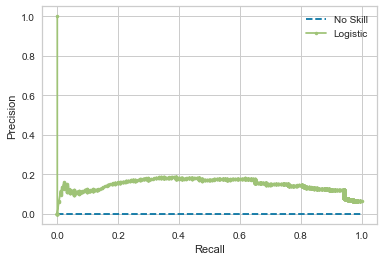

In [37]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.07, 1: 0.93})
model.fit(CBE_train,y_trw)
# predict probabilities
yhat = model.predict_proba(CBE_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_tew, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
#ix = argmax(fscore)
#print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
#pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

***The best threshold is 0.636 with f1 score of 0.27839 on test data***

## Summary

In continuation of evaluating different techniques for improving classification performance different approaches are tried out.
After hyperparameter tuning using pycaret package we found the best logistic regression classifer

LogisticRegression(C=9.921, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Different approaches tried out as listed below-

1. Using Weight of evidence encoder and logistic regression with optimized class weights:

    'class_weight': {0: 0.1293467336683417, 1: 0.8706532663316583}}
    
    The f1 score for the training data: 0.28461833525124663
    
    The f1 score for the testing data: 0.21162444113263784
    
    
    Threshold moving showed that for test data set, at threshold of 0.449 f1 score increased to 0.24417
    
2. Using CatBoost encoder and logistic regression with optimized class weights:

    'class_weight': {0: 0.06964824120603015, 1: 0.9303517587939698}}
    
    The f1 score for the training data: 0.22631390775831248
    
    The f1 score for the testing data: 0.21450712957222567
    
    
    Threshold moving showed that for test data set, at threshold of 0.636 f1 score increased to 0.27839

In the final step of modeling, both the models with SMOTENN balancing technique will be tried out
            